In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
%matplotlib inline

In [16]:
df = pd.read_csv('C:/duh/Thinkful/Thinkful/Exercises/CA-AstroPh.csv', sep='\s+')

In [17]:
tuples = [(x[0], x[1]) for x in df.values]

In [18]:
citations = nx.Graph()

In [19]:
citations.add_edges_from(tuples)

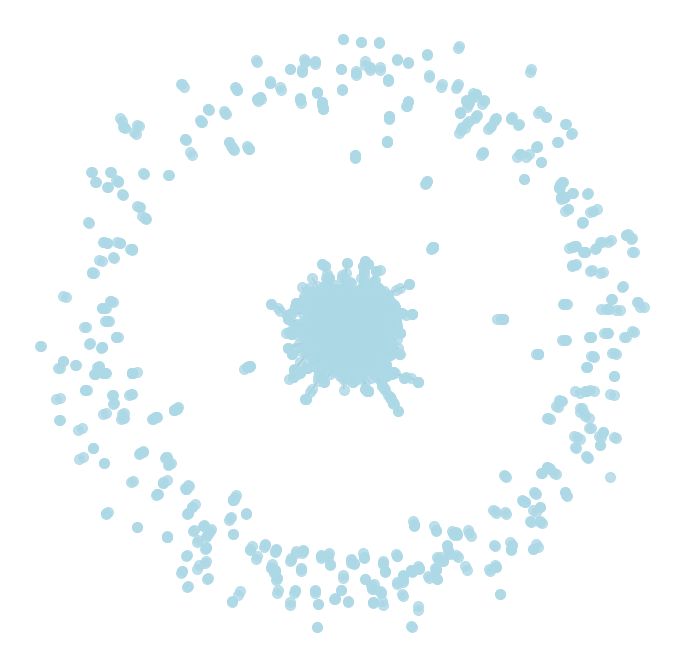

In [20]:
plt.rcParams['figure.figsize']=[12,12]
nx.draw_networkx(citations,
                 pos=nx.spring_layout(citations,weight='weights'), 
                 node_color='lightblue',
                 edge_color='gray',
                 node_size=100,
                 with_labels=False,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

This graph has 18772 nodes and 198110 edges.
The median degree is 9.0 and the mean degree is 21.10696782441935.
A disease node with median degree is connected to 0.047943746004687836% of other diseases.
There are 290 connected components within the graph.


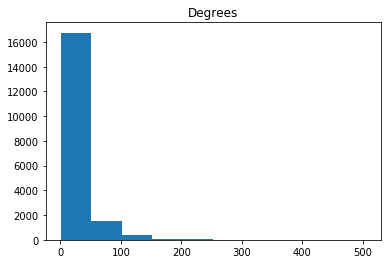

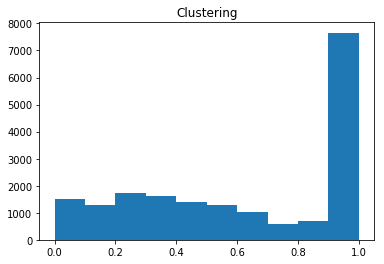

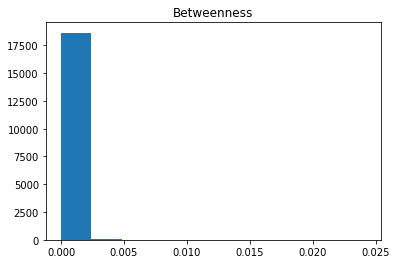

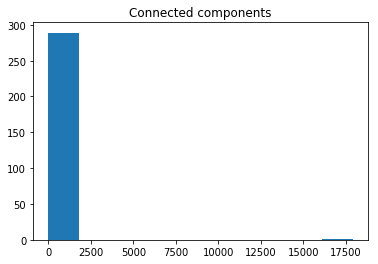

In [21]:
numberofnodes=citations.number_of_nodes()
nodedegrees=list(dict(citations.degree).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(citations).values())
betweenness_cent=list(nx.betweenness_centrality(citations).values())
componentsizes=[len(c) for c in sorted(
    nx.connected_components(citations), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(
    citations.number_of_nodes(),citations.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A disease node with median degree is connected to {}% of other diseases.".format(
    (med_degree/numberofnodes)*100))

print("There are {} connected components within the graph.".format(
    nx.number_connected_components(citations)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

In [22]:
graph_stats=pd.DataFrame({'node':list(dict(citations.degree()).keys()),
                          'degree':list(dict(citations.degree()).values()),
                          'clustering':list(nx.clustering(citations).values()),
                          'betweenness_cent':list(
                              nx.betweenness_centrality(citations).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(citations), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
print(graph_stats.head())

    node  degree  clustering  betweenness_cent  component
0  84424      75    0.075676          0.001443          0
1    276      31    0.116129          0.000725          0
2   1662      43    0.241417          0.000075          0
3   5089       2    1.000000          0.000000          0
4   6058      90    0.229213          0.000581          0


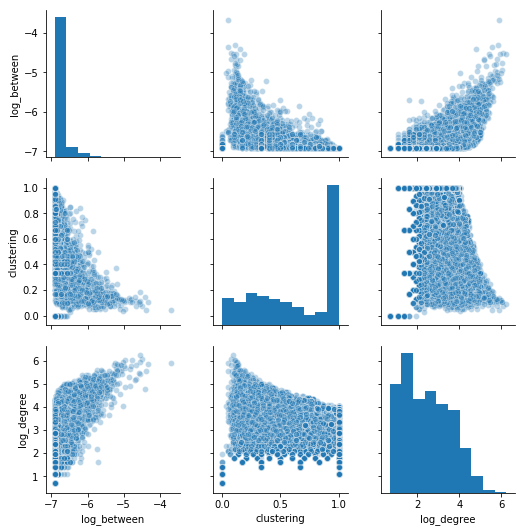

In [23]:
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_between','clustering','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()